<a href="https://colab.research.google.com/github/Limsungrae/2024/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A524_09_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install huggingface_hub # Ensure the huggingface_hub library is installed

from huggingface_hub import list_datasets # Import the correct function

# # ... your code to get the token ...
# !huggingface-cli login # Log in to Hugging Face and obtain a token

# all_datasets = list_datasets()

In [ ]:
# dataset_url = "https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt"
# emotions_remote = load_dataset("csv", data_files=dataset_url, sep=";",
#                                names=["text", "label"])

In [ ]:
# from datasets import load_dataset
# from huggingface_hub import list_datasets

# all_datasets = [ds.id for ds in list_datasets()]
# print(f"현재 허브에는 {len(all_datasets)}개의 데이터셋이 있습니다.")
# print(f"처음 10개 데이터셋: {all_datasets[:10]}")

# # emotion 데이터셋이 다운로드되지 않으면 SetFit/emotion을 사용합니다.
# emotions = load_dataset("emotion")

In [7]:
# 코랩을 사용하지 않으면 이 셀의 코드를 주석 처리하세요.
!git clone https://github.com/rickiepark/nlp-with-transformers.git
%cd nlp-with-transformers
from install import *
install_requirements(chapter=2)

Cloning into 'nlp-with-transformers'...
remote: Enumerating objects: 653, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 653 (delta 47), reused 16 (delta 8), pack-reused 569 (from 1)
Receiving objects: 100% (653/653), 62.41 MiB | 11.97 MiB/s, done.
Resolving deltas: 100% (335/335), done.
/content/nlp-with-transformers/nlp-with-transformers
⏳ Installing base requirements ...
✅ Base requirements installed!
Using transformers v4.44.2
Using datasets v2.21.0
Using accelerate v0.33.0
Using sentencepiece v0.1.99
Using umap v0.5.6
No GPU was detected! This notebook can be *very* slow without a GPU 🐢
Go to Runtime > Change runtime type and select a GPU hardware accelerator.


In [8]:
from huggingface_hub import list_datasets

all_datasets = [ds.id for ds in list_datasets()]
print(f"현재 허브에는 {len(all_datasets)}개의 데이터셋이 있습니다.")
print(f"처음 10개 데이터셋: {all_datasets[:10]}")

현재 허브에는 206757개의 데이터셋이 있습니다.
처음 10개 데이터셋: ['amirveyseh/acronym_identification',
'ade-benchmark-corpus/ade_corpus_v2', 'UCLNLP/adversarial_qa',
'Yale-LILY/aeslc', 'nwu-ctext/afrikaans_ner_corpus', 'fancyzhx/ag_news',
'allenai/ai2_arc', 'google/air_dialogue', 'komari6/ajgt_twitter_ar',
'legacy-datasets/allegro_reviews']


In [9]:
from datasets import load_dataset

# emotion 데이터셋이 다운로드되지 않으면 SetFit/emotion을 사용합니다.
emotions = load_dataset("emotion")

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [10]:
# SetFit/emotion 데이터셋의 경우 수동으로 ClassLabel 객체를 만들어 label에 할당합니다.
from datasets import ClassLabel

emotions['train'].features['label'] = ClassLabel(
    num_classes=6,
    names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])

In [11]:
emotions


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [12]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [17]:
len(train_ds)


16000

In [19]:
train_ds.column_names


['text', 'label']

In [20]:
print(train_ds.features)


{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness',
'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [14]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [15]:
train_ds[-5:]

{'text': ['i just had a very brief time in the beanbag and i said to anna that i feel like i have been beaten up',
  'i am now turning and i feel pathetic that i am still waiting tables and subbing with a teaching degree',
  'i feel strong and good overall',
  'i feel like this was such a rude comment and im glad that t',
  'i know a lot but i feel so stupid because i can not portray it'],
 'label': [0, 0, 1, 3, 0]}

In [21]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [22]:
df.describe()

,label
count,16000.000000
mean,1.565937
std,1.501430
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,5.000000


In [23]:
df.value_counts("label")

,count
label,
1,5362
0,4666
3,2159
4,1937
2,1304
5,572


In [24]:
# 정수 레이블을 해당하는 문자열 레이블로 변환하는 함수 정의
def label_int2str(row):
    # 'row'는 정수 레이블을 의미하며, 이를 'ClassLabel' 객체의 'int2str' 메서드를 사용하여 문자열로 변환
    return emotions["train"].features["label"].int2str(row)

# 데이터프레임 'df'의 'label' 컬럼에 있는 정수 레이블을 문자열 레이블로 변환하여 새로운 'label_name' 컬럼에 저장
df["label_name"] = df["label"].apply(label_int2str)

# 데이터프레임 'df'의 상위 5개 행을 출력하여 변환된 'label_name' 컬럼을 확인
df.head()


,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


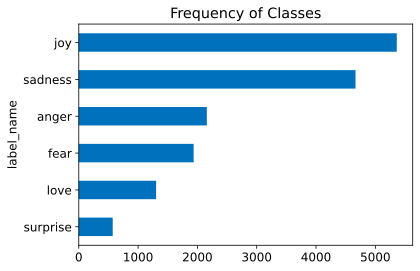

In [25]:
import matplotlib.pyplot as plt  # Matplotlib의 pyplot 모듈을 가져와서 시각화 기능을 사용합니다.

# 'df' 데이터프레임의 'label_name' 컬럼에서 각 레이블의 빈도를 계산하고,
# 빈도가 낮은 것부터 높은 것 순으로 정렬하여 수평 막대그래프로 시각화합니다.
df["label_name"].value_counts(ascending=True).plot.barh()

# 그래프의 제목을 "Frequency of Classes"로 설정합니다.
plt.title("Frequency of Classes")

# 생성한 그래프를 화면에 표시합니다.
plt.show()


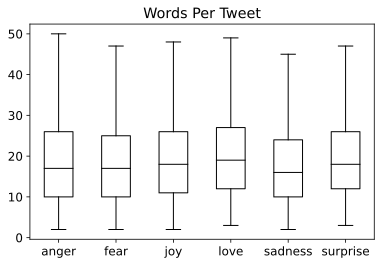

In [27]:
# 'text' 컬럼의 각 텍스트를 단어 단위로 분리하고, 각 텍스트의 단어 수를 계산하여
# 새로운 'Words Per Tweet' 컬럼에 저장합니다.
df["Words Per Tweet"] = df["text"].str.split().apply(len)

# 'Words Per Tweet' 컬럼의 단어 수에 대해 각 'label_name'별로 박스 플롯을 생성합니다.
# - grid=False: 배경 격자를 표시하지 않습니다.
# - showfliers=False: 이상치(outliers)를 표시하지 않습니다.
# - color="black": 박스 플롯의 색상을 검정색으로 설정합니다.
df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False, color="black")

# 박스 플롯의 기본 제목을 제거합니다.
plt.suptitle("")

# x축 레이블을 빈 문자열로 설정하여 기본 x축 레이블을 제거합니다.
plt.xlabel("")

# 생성한 박스 플롯을 화면에 표시합니다.
plt.show()
